# Reward Competition: High vs. Low Comp Analysis

In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind


In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts"

manual_scoring_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

# hvl_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\HvL_comp_scoring_updated.xlsx"
hvl_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\HvL_comp_scoring.xlsx"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Test"

In [3]:
rc_exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)
rc_exp.rtc_processing()
# rc_exp.read_manual_scoring(manual_scoring_path)
# rc_exp.merge_data()

rc_exp.read_and_merge_manual_scoring(manual_scoring_path)
rc_exp.remove_specified_subjects()   # Remove specified subjects from the analysis
rc_exp.read_hvl_scoring(hvl_path)
# rc_exp.read_hvl_scoring_keep_ties(hvl_path)
# print(rc_exp.trials_df)
rc_exp.remove_tangles(placeholders= True)   # Remove sound cues and winner array indexes where there are tangles
rc_exp.extract_da_columns()   # Grab only essential columns for analysis
rc_exp.find_first_port_entry_after_sound_cue()

rc_exp.compute_EI_DA(tone_window=(-5,10),
                  pe_window=(0,10),
                  baseline_window=(-20,-10))


# rc_exp.compute_EI_DA(tone_window=(-5,10),
#                   pe_window=(0,10),
#                   baseline_window=(-4,0))

rc_exp.compute_pretrial_EI_DA(pretrial_window=(-10,0),
                  baseline_window=(-14,-10))

rc_exp.compute_rtc_da_metrics(include_pretrial=True, bout_duration=4).head()


Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240912-080246\Notes.txt
read from t=0s to t=2051.77s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240913-094304\Notes.txt
read from t=0s to t=2044.77s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240915-060250\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n5-240915-095000\Notes.txt
read from t=0s to t=2070.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

c:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Reward_Training-Competition\Reward_Competition\rc_extension.py:474: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hv[pre_cols]  = hv[pre_cols].replace('T', np.nan).apply(pd.to_numeric, errors='coerce')
c:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Reward_Training-Competition\Reward_Competition\rc_extension.py:475: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hv[comp_cols] = hv[comp_cols].replace('T', np.nan).apply(pd.to_numeric, errors='coerce')


,subject_name,file name,trial,filtered_sound_cues,filtered_port_entries,filtered_port_entry_offset,filtered_winner_array,HVL_PreComp,HVL_Comp,first_PE_after_sound_cue,...,Tone Time of Max Peak,Tone Mean Z-score,PE AUC,PE Max Peak,PE Time of Max Peak,PE Mean Z-score,Pretrial AUC,Pretrial Max Peak,Pretrial Time of Max Peak,Pretrial Mean Z-score
0,nn5,nn5-250203-080636,<trial_class.Trial object at 0x000001C9F96DFEC0>,"[241.12775168, 321.12836608, 411.12895488, 491...","[184.1774592, 185.80733952, 193.31743744, 285....","[184.47745024, 187.45769984, 193.45752064, 285...","[tie, nn8, nn8, nn8, nn8, nn8, nn8, nn8, nn8, ...","[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[285.35799808, 325.12836608, 415.12895488, 495...",...,"[0.7599999998637941, 0.7299999998645035, 0.849...","[0.5802336747137268, 1.0628530397409286, 0.351...","[0.6171770231792162, 0.8103694032097739, 1.302...","[1.7444741505890045, 1.0771713947169135, 1.236...","[0.0, 3.329999999921256, 1.729999999959091, 3....","[0.15554037603863283, 0.20191823874917406, 0.3...","[-2.849382550168764, -1.3336872573869143, 0.66...","[0.5931472481063685, 1.0071056302787829, 1.468...","[-8.490000000035707, -3.4200000001555964, -0.8...","[-0.2852658182810076, -0.1337081639029117, 0.0..."
1,pp5,pp5-250203-080636,<trial_class.Trial object at 0x000001C9F96DF3B0>,"[241.12775168, 321.12836608, 411.12895488, 491...","[181.1275776, 184.02738176, 185.90744576, 187....","[181.68741888, 185.52766464, 186.98747904, 187...","[pp5, pp5, pp5, pp5, pp8, pp5, pp8, tangle, ta...","[0.0, 0.0, nan, 1.0, 1.0, 0.0, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, ...","[245.12775168, 325.12836608, 415.12895488, 495...",...,"[1.5599999998448766, 0.30999999987443516, 3.99...","[0.2669676790867533, 0.1852523567749728, -0.63...","[5.950139337912823, 0.014127306905708237, 2.29...","[2.8878636660121964, 1.4146806890091848, 1.390...","[1.6799999999602733, 2.769999999934498, 3.5499...","[1.486451562915203, 0.0022014073336268122, 0.5...","[1.8332802116328355, 1.7517189334442307, 2.378...","[1.4933537085859405, 1.404225722707683, 2.0700...","[-2.9000000001678927, -9.35000000001537, -6.44...","[0.1830518255475024, 0.1757293702764755, 0.237..."
2,nn1,nn1-250203-085508,<trial_class.Trial object at 0x000001C9F2B8FAD0>,"[250.00820736, 330.00865792, 420.00941056, 500...","[194.11779584, 203.48796928, 215.75778304, 217...","[196.25771008, 206.667776, 217.06801152, 217.8...","[nn2, nn1, nn1, nn1, nn1, nn1, nn2, nn2, nn1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, ...","[254.00820736, 334.00865792, 424.00941056, 504...",...,"[1.7699999998399107, 0.7599999998637941, 0.919...","[-0.5260376430763154, 0.7905916884713389, 0.63...","[-0.38772886319409317, 3.201734063472012, 1.82...","[0.4053416088639346, 4.294016009135805, 2.3342...","[2.0799999999508145, 0.8999999999787178, 0.829...","[-0.09679108789204786, 0.7968868844887507, 0.4...","[-6.219682915576498, -4.024362126982294, -5.54...","[1.4058687016702707, 0.7591264878106921, 2.433...","[-9.640000000008513, -9.910000000002128, -6.30...","[-0.6218682903413478, -0.4018647191271188, -0...."
3,nn3,nn3-250203-085508,<trial_class.Trial object at 0x000001C9F750ED20>,"[250.00820736, 330.00865792, 420.00941056, 500...","[219.1179776, 230.92805632, 231.34830592, 244....","[225.37814016, 231.26818816, 232.78813184, 246...","[nn3, nn4, nn3, nn4, nn4, nn4, nn4, nn4, nn4, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[254.00820736, 334.00865792, 424.00941056, 504...",...,"[0.8099999998626117, 0.71999999986474, 0.69999...","[1.9646313990298285, 0.9896661193221952, 2.228...","[9.073446319493542, 1.5730904070593548, 10.878...","[5.7039152776901885, 1.2824150996300059, 7.441...","[1.1599999999725696, 2.599999999938518, 1.0599...","[2.265042353999151, 0.39369404810126674, 2.714...","[-6.01783543321439

In [4]:
rc_exp.da_df['HVL_Comp']

0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, nan, ...
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 0.0, ...
3     [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
4     [0.0, 1.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ...
                            ...                        
66                                                   []
67    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
68    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
69    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
70    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
Name: HVL_Comp, Length: 71, dtype: object

In [5]:
rc_exp.da_df.columns

Index(['subject_name', 'file name', 'trial', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'filtered_winner_array', 'HVL_PreComp', 'HVL_Comp',
       'first_PE_after_sound_cue', 'Tone_Time_Axis', 'Tone_Zscore',
       'PE_Time_Axis', 'PE_Zscore', 'Pretrial_Time_Axis', 'Pretrial_Zscore',
       'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak',
       'Tone Mean Z-score', 'PE AUC', 'PE Max Peak', 'PE Time of Max Peak',
       'PE Mean Z-score', 'Pretrial AUC', 'Pretrial Max Peak',
       'Pretrial Time of Max Peak', 'Pretrial Mean Z-score'],
      dtype='object')

In [6]:
rc_exp.da_df[['subject_name','HVL_PreComp', 'Pretrial AUC', 'filtered_winner_array','Pretrial_Zscore','Pretrial_Time_Axis']].head(0)
# rc_exp.da_df.columns

,subject_name,HVL_PreComp,Pretrial AUC,filtered_winner_array,Pretrial_Zscore,Pretrial_Time_Axis


## Pretrial

Explode based on pretrial or trial

In [7]:
def explode_event_traces(
    df: pd.DataFrame,
    comp_col:      str,
    time_col:      str,
    trace_col:     str,
    array_cols:    list[str]  = None
) -> pd.DataFrame:
    """
    For each session-row in df, explodes each event i into its own row:
      subject_name | comp | time (1d-array) | trace (1d-array) | <other array cols>...
    Drops any events where comp is nan.

    Parameters
    ----------
    df : DataFrame
        Must contain at least columns [subject_name, comp_col, time_col, trace_col]
        and any array_cols you want to carry along.
    comp_col, time_col, trace_col : str
        Column names holding lists/arrays of comps, time axes, and traces.
    array_cols : list[str]
        List of additional column names in `df` whose values are lists/arrays
        of the same length.  Each element at index i will be picked into the
        exploded row.  If None, no extras are grabbed.

    Returns
    -------
    exploded : DataFrame
        One row per event, with scalar comp and array-valued time/trace, plus
        scalar or array values for each array_cols entry.
    """
    if array_cols is None:
        array_cols = []

    rows = []
    for _, row in df.iterrows():
        subj   = row['subject_name']
        comps  = row.get(comp_col)  or []
        times  = row.get(time_col)  or []
        traces = row.get(trace_col) or []
        # get other arrays, default to [] if missing
        extras = {
            col: (row.get(col) or [])
            for col in array_cols
        }

        n = max(len(comps), len(times), len(traces), 
                *[len(extras[col]) for col in array_cols])

        for i in range(n):
            c = comps[i]  if i < len(comps)  else np.nan
            if pd.isna(c):
                continue

            t = times[i]  if i < len(times)  else []
            z = traces[i] if i < len(traces) else []

            # build base dict
            out = {
                'subject_name': subj,
                'comp':         int(c),
                'time':         np.asarray(t, dtype=float),
                'trace':        np.asarray(z, dtype=float),
            }

            # add each extra column element
            for col in array_cols:
                arr = extras[col]
                out[col] = arr[i] if i < len(arr) else np.nan

            rows.append(out)

    return pd.DataFrame(rows)



def explode_event_traces_ties(
    df: pd.DataFrame,
    comp_col:      str,
    time_col:      str,
    trace_col:     str,
    array_cols:    list[str]  = None,
    *,
    tie_mask_col:  str | None = None,     # optional boolean list column marking ties
    tie_tokens:    tuple = ("T", "t", "tie", "Tie", "TIE"),
    keep_ties:     bool = True,           # include tie rows?
    ties_only:     bool = True,          # include ONLY tie rows?
    drop_missing_non_tie: bool = True     # drop rows where comp is missing and not a tie
) -> pd.DataFrame:
    """
    Explode per-event arrays to rows, preserving 'ties'.

    - If `tie_mask_col` is provided, an event is a tie when that mask[i] is True.
    - Otherwise, an event is a tie if comp equals a string in `tie_tokens` OR comp is NaN.
    - Adds an `outcome` column: 'tie' or 'non-tie'.
    - Keeps both original `comp_raw` and a numeric `comp_num` (when castable).

    Returns one row per event with:
      subject_name | outcome | comp_raw | comp_num | time | trace | <array_cols>...
    """
    if array_cols is None:
        array_cols = []

    def _is_tie(i, comps, row):
        # Priority: explicit boolean tie mask if provided
        if tie_mask_col is not None:
            mask = row.get(tie_mask_col) or []
            return (i < len(mask)) and bool(mask[i])
        # Fallback: detect ties from comp token or NaN
        c = comps[i] if i < len(comps) else np.nan
        if isinstance(c, str) and c.strip() in tie_tokens:
            return True
        return pd.isna(c)

    def _to_int_or_nan(x):
        # best-effort numeric cast; return np.nan if not numeric
        try:
            if pd.isna(x): 
                return np.nan
        except Exception:
            pass
        try:
            # allow float-like "3.0" or "3"
            v = float(x)
            if np.isnan(v):
                return np.nan
            return int(v)
        except Exception:
            return np.nan

    rows = []
    for _, row in df.iterrows():
        subj   = row['subject_name']
        comps  = row.get(comp_col)  or []
        times  = row.get(time_col)  or []
        traces = row.get(trace_col) or []
        extras = {col: (row.get(col) or []) for col in array_cols}

        n = max(len(comps), len(times), len(traces), *[len(extras[col]) for col in array_cols] or [0])

        for i in range(n):
            tie = _is_tie(i, comps, row)

            # filtering logic for ties
            if ties_only and not tie:
                continue
            if not keep_ties and tie:
                continue

            c_raw = comps[i] if i < len(comps) else np.nan
            # if not a tie and comp is missing, optionally drop
            if (not tie) and drop_missing_non_tie and pd.isna(c_raw):
                continue

            t = times[i]  if i < len(times)  else []
            z = traces[i] if i < len(traces) else []

            out = {
                'subject_name': subj,
                'outcome':      'tie' if tie else 'non-tie',
                'comp_raw':     c_raw,                         # preserves original token/number
                'comp':     _to_int_or_nan(c_raw),         # numeric when possible, else NaN
                'time':         np.asarray(t, dtype=float),
                'trace':        np.asarray(z, dtype=float),
            }
            for col in array_cols:
                arr = extras[col]
                out[col] = arr[i] if i < len(arr) else np.nan

            rows.append(out)

    return pd.DataFrame(rows)


In [8]:
def plot_psth_for_region(
    exploded_df: pd.DataFrame,
    region:      str   = 'NAc',           # choose 'NAc' or 'mPFC'
    time_col:    str   = 'time',
    trace_col:   str   = 'trace',
    comp_col:    str   = 'comp',
    time_window: tuple = (-5.0, 10.0),
    line_at:     float = 4.0,
    colors:      tuple = ('#a839a4', '#43246a'),  # hex color codes
    labels:      tuple = ('Low comp', 'High comp'),
    figsize:     tuple = (11,8),
    title:       str   = None,            # user-defined title
    ylims:       tuple = None             # user-defined y-axis limits (min, max)
):
    """
    Plot mean ± SEM PSTH for a single region (NAc or mPFC),
    split by low vs. high comp. Colors can be hex codes.
    """
    # map region name → subject_name prefix
    prefix_map = {'NAc': 'n', 'mPFC': 'p'}
    if region not in prefix_map:
        raise ValueError(f"region must be one of {list(prefix_map)}")
    prefix = prefix_map[region]

    # --- 1) find the smallest dt across all events ---
    all_dts = [
        np.min(np.diff(t))
        for t in exploded_df[time_col]
        if getattr(t, "size", 0) > 1
    ]
    if not all_dts:
        raise RuntimeError("No valid Δt found in time axes!")
    dt = min(all_dts)

    # --- 2) build common time axis ---
    t0, t1 = time_window
    common_t = np.arange(t0, t1 + dt/2, dt)

    # --- 3) filter to this region ---
    sub = exploded_df[exploded_df['subject_name'].str.startswith(prefix)]
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    if sub.empty:
        ax.set_title(f"No data for {region}", fontsize=36)
        ax.axis('off')
        plt.show()
        return

    # --- 4) compute & plot low vs. high comp ---
    for comp_val, lbl, col in zip((0, 1), labels, colors):
        grp = sub[sub[comp_col] == comp_val]
        if grp.empty:
            continue

        mats = []
        for _, row in grp.iterrows():
            t_evt = row[time_col]
            z_evt = row[trace_col]
            z_i = np.interp(
                common_t, t_evt, z_evt,
                left=np.nan, right=np.nan
            )
            mats.append(z_i)

        M = np.vstack(mats)
        mean_trace = np.nanmean(M, axis=0)
        sem_trace  = np.nanstd(M, axis=0, ddof=1) / np.sqrt(M.shape[0])

        ax.plot(common_t, mean_trace, lw=2, label=lbl, color=col)
        ax.fill_between(common_t,
                        mean_trace - sem_trace,
                        mean_trace + sem_trace,
                        alpha=0.3, color=col)

    # --- 5) styling ---
    ax.axvline(0, color='k', ls='--', lw=1.5)
    ax.axvline(line_at, color='red', ls='--', lw=1.5)

    # Title
    plot_title = title if title is not None else f"{region} High vs. Low Comp"
    ax.set_title(plot_title, fontsize=36, pad=40)

    # Axis labels
    ax.set_xlim(time_window)
    if ylims is not None:
        ax.set_ylim(ylims)
    ax.set_xlabel("Time (s)", fontsize=37)
    ax.set_ylabel("Event-Induced z-scored ΔF/F", fontsize=37, labelpad=15)
    ax.tick_params(axis='both', which='major', labelsize=30)

    # Legend
    ax.legend(frameon=False, fontsize=20, loc='upper right')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


In [9]:
metrics = [
    'filtered_winner_array', 'HVL_PreComp', 'Pretrial_Time_Axis', 'Pretrial_Zscore',
    'Pretrial AUC', 'Pretrial Max Peak', 'Pretrial Time of Max Peak', 'Pretrial Mean Z-score'
]

pretrial_exploded = explode_event_traces(
    rc_exp.da_df,
    comp_col  = 'HVL_PreComp',
    time_col  = 'Pretrial_Time_Axis',
    trace_col = 'Pretrial_Zscore',
    array_cols=metrics
)



In [10]:
pretrial_exploded.head()

,subject_name,comp,time,trace,filtered_winner_array,HVL_PreComp,Pretrial_Time_Axis,Pretrial_Zscore,Pretrial AUC,Pretrial Max Peak,Pretrial Time of Max Peak,Pretrial Mean Z-score
0,nn5,0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.6331469808622158, -0.6416844621474599, -0....",nn8,0.0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.6331469808622158, -0.6416844621474599, -0....",-1.333687,1.007106,-3.42,-0.133708
1,nn5,0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.612908859073835, -0.584517236745723, -0.55...",nn8,0.0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.612908859073835, -0.584517236745723, -0.55...",0.662839,1.468597,-0.82,0.065832
2,nn5,0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.05802353785014144, 0.014486839845256505, 0...",nn8,0.0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.05802353785014144, 0.014486839845256505, 0...",3.436629,6.407753,-4.42,0.342966
3,nn5,0,"[-10.0, -9.990000000000236, -9.980000000000473...","[0.3345489519925748, 0.33488041980267524, 0.36...",nn8,0.0,"[-10.0, -9.990000000000236, -9.980000000000473...","[0.3345489519925748, 0.33488041980267524, 0.36...",11.679567,4.479581,-7.97,1.166766
4,nn5,0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.32109386954153807, -0.3217502511750373, -0...",nn8,0.0,"[-10.0, -9.990000000000236, -9.980000000000473...","[-0.32109386954153807, -0.3217502511750373, -0...",-1.500504,1.028468,-7.69,-0.150144


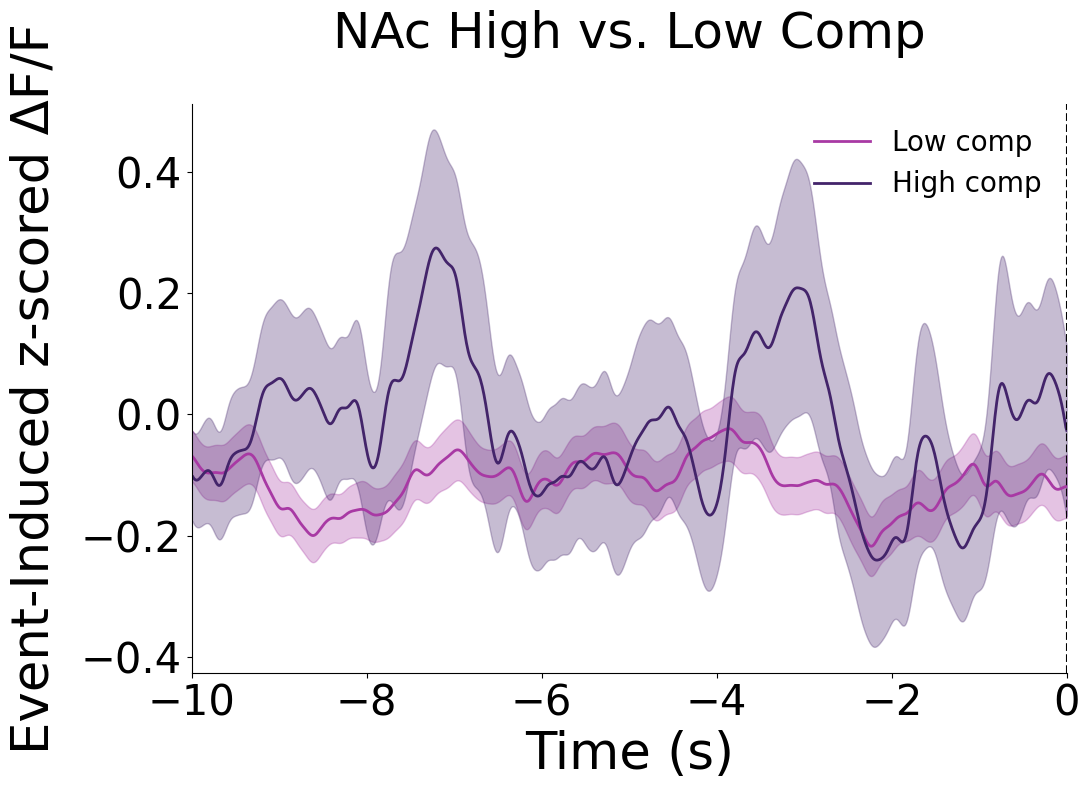

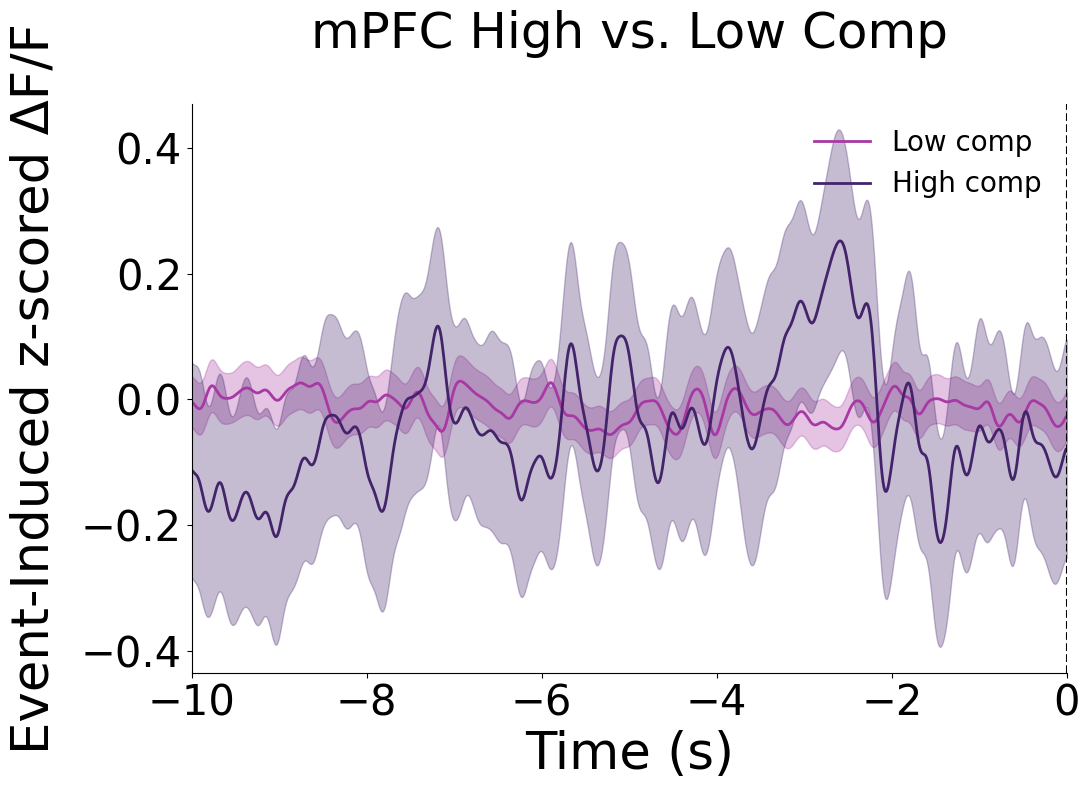

In [11]:
plot_psth_for_region(
    exploded_df = pretrial_exploded,
    region = 'NAc',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-10,0),
    labels      = ('Low comp','High comp')
)

plot_psth_for_region(
    exploded_df = pretrial_exploded,
    region = 'mPFC',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-10,0),
    labels      = ('Low comp','High comp')
)

Pretrial Stats

In [12]:
def plot_comp_by_region(
    exploded_df,
    region:    str,         # 'NAc' or 'mPFC'
    metric:    str,         # e.g. 'Pretrial AUC'
    comp_col:  str = 'comp',
    plot_dots: bool = False
):
    """
    Bar plot of mean ± SEM for `metric`, comparing low vs high comp
    within the specified brain region, plus printed stats.
    If plot_dots=True, also scatter each individual value.
    """
    # map region → prefix for subject_name
    prefix_map = {'NAc': 'n', 'mPFC': 'p'}
    if region not in prefix_map:
        raise ValueError(f"region must be one of {list(prefix_map)}")
    prefix = prefix_map[region]

    # filter to region
    df = exploded_df[exploded_df['subject_name'].str.startswith(prefix)]
    if df.empty:
        raise ValueError(f"No data for region {region}")

    # split into low/high comp
    groups = {
        0: df[df[comp_col] == 0][metric].dropna(),
        1: df[df[comp_col] == 1][metric].dropna()
    }

    # compute means & SEMs
    means = [g.mean() for g in (groups[0], groups[1])]
    sems  = [g.sem()  for g in (groups[0], groups[1])]

    # print group stats and t-test
    n0, n1 = len(groups[0]), len(groups[1])
    print(f"Low comp  (n={n0}): mean={means[0]:.3f}, SEM={sems[0]:.3f}")
    print(f"High comp (n={n1}): mean={means[1]:.3f}, SEM={sems[1]:.3f}")
    t_stat, p_val = ttest_ind(groups[0], groups[1], nan_policy='omit')
    print(f"T-test: t={t_stat:.3f}, p={p_val:.3f}")

    # plot bar chart
    labels = ['Low comp', 'High comp']
    colors = ['blue', 'orange']
    x = np.arange(2)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(x, means, yerr=sems, color=colors, capsize=5)

    # optionally scatter individual points
    if plot_dots:
        for xi, comp in enumerate((0, 1)):
            y = groups[comp]
            xs = np.random.normal(loc=xi, scale=0.05, size=len(y))
            ax.scatter(
                xs, y,
                facecolor=colors[comp],
                edgecolor='lightgrey',
                linewidth=0.8,
                alpha=0.8
            )

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel(metric)
    ax.set_title(f"{region}: {metric} by Competition Level")
    plt.tight_layout()
    plt.show()


Low comp  (n=294): mean=-1.130, SEM=0.280
High comp (n=41): mean=-0.187, SEM=0.893
T-test: t=-1.151, p=0.251


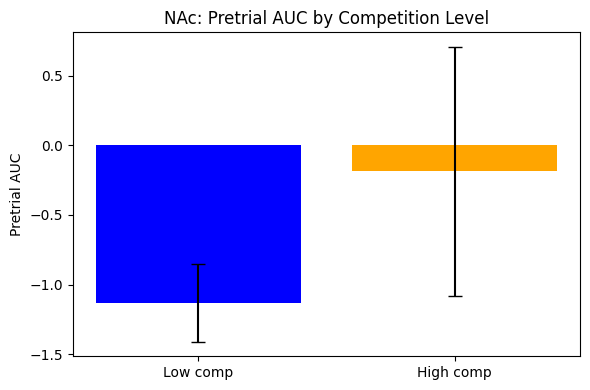

Low comp  (n=538): mean=-0.125, SEM=0.282
High comp (n=38): mean=-0.418, SEM=1.233
T-test: t=0.265, p=0.791


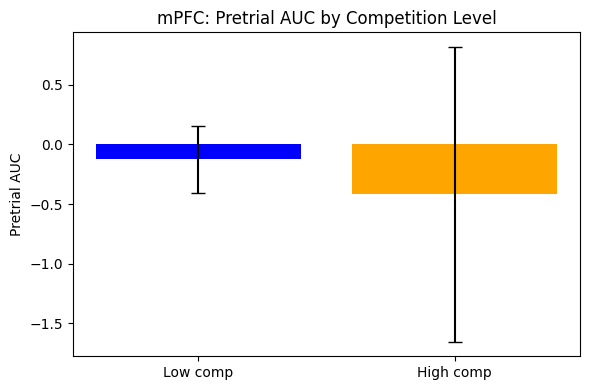

In [13]:
# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='NAc',
    metric='Pretrial AUC',
    plot_dots=False
)

# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='mPFC',
    metric='Pretrial AUC'
)


Low comp  (n=294): mean=1.999, SEM=0.084
High comp (n=41): mean=2.651, SEM=0.280
T-test: t=-2.630, p=0.009


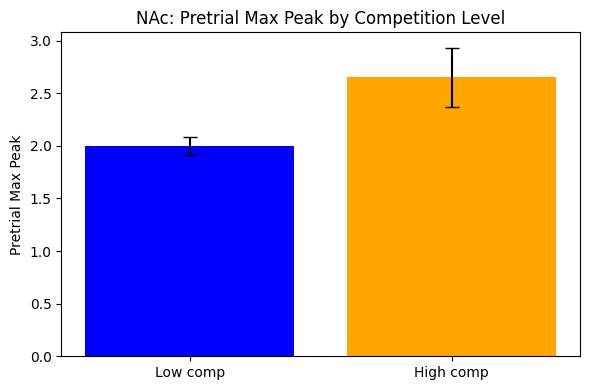

Low comp  (n=538): mean=1.385, SEM=0.037
High comp (n=38): mean=1.388, SEM=0.160
T-test: t=-0.020, p=0.984


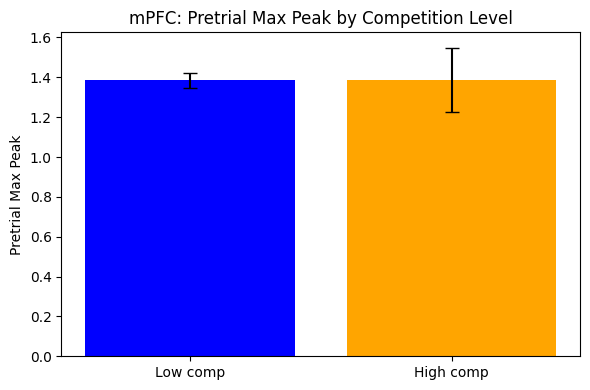

In [14]:
# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='NAc',
    metric='Pretrial Max Peak',
    plot_dots=False
)

# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='mPFC',
    metric='Pretrial Max Peak'
)


Low comp  (n=294): mean=-5.013, SEM=0.178
High comp (n=41): mean=-4.995, SEM=0.466
T-test: t=-0.035, p=0.972


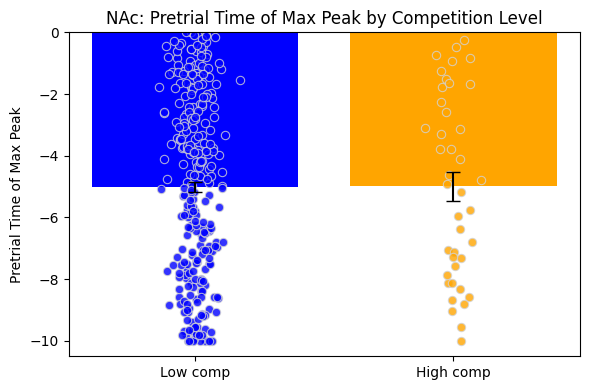

Low comp  (n=538): mean=-5.152, SEM=0.137
High comp (n=38): mean=-4.307, SEM=0.537
T-test: t=-1.579, p=0.115


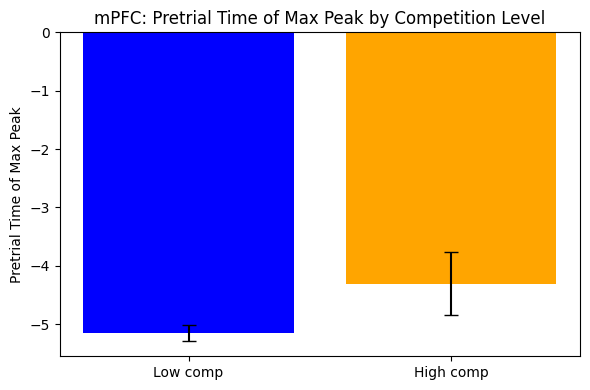

In [15]:
# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='NAc',
    metric='Pretrial Time of Max Peak',
    plot_dots=True
)

# Compare pretrial AUC in the NAc for low vs. high comp:
plot_comp_by_region(
    exploded_df=pretrial_exploded,
    region='mPFC',
    metric='Pretrial Time of Max Peak'
)


## Trial HvL regardless of Win vs. Loss

In [16]:
metrics = [
    'filtered_winner_array', 'HVL_Comp', 'Tone_Time_Axis', 'Tone_Zscore',
    'PE_Time_Axis', 'PE_Zscore', 
    'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak', 'Tone Mean Z-score',
    'PE AUC', 'PE Max Peak', 'PE Time of Max Peak', 'PE Mean Z-score',
]

trial_exploded = explode_event_traces(
    rc_exp.da_df,
    comp_col  = 'HVL_Comp',
    time_col  = 'Tone_Time_Axis',
    trace_col = 'Tone_Zscore',
    array_cols=metrics
)


C:\Users\alber\AppData\Local\Temp\ipykernel_6660\470570068.py:65: RuntimeWarning: Mean of empty slice
  mean_trace = np.nanmean(M, axis=0)
c:\Users\alber\anaconda3\envs\photometry\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


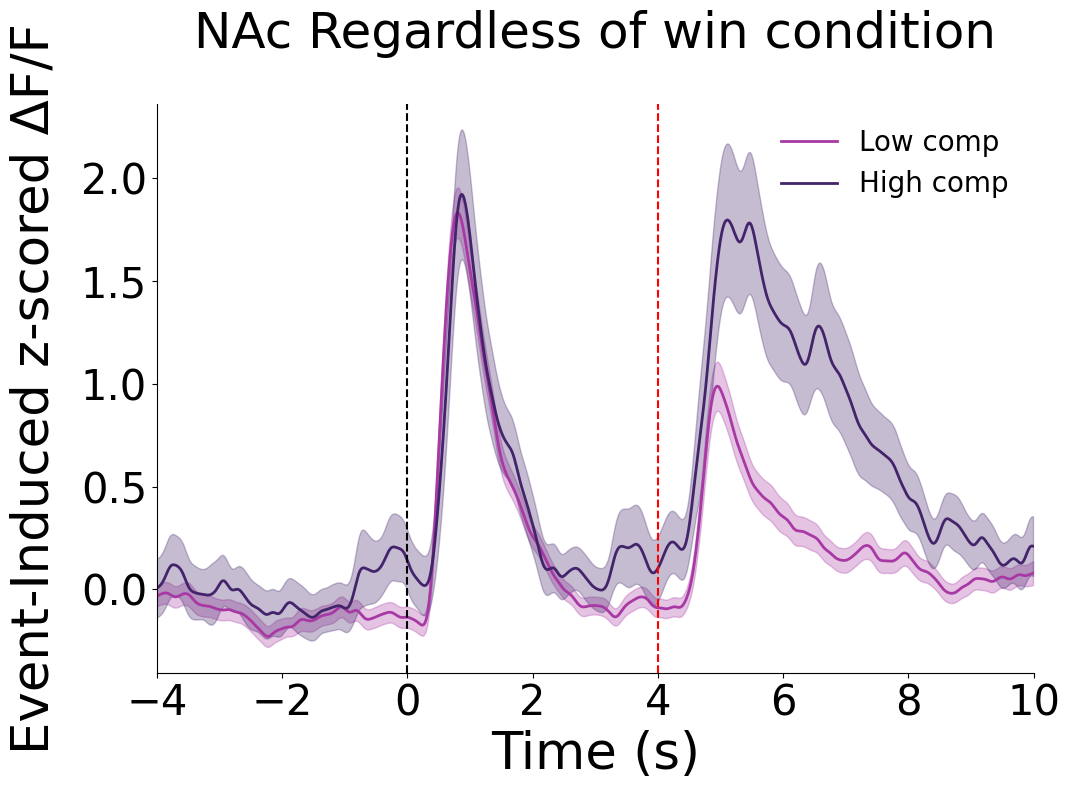

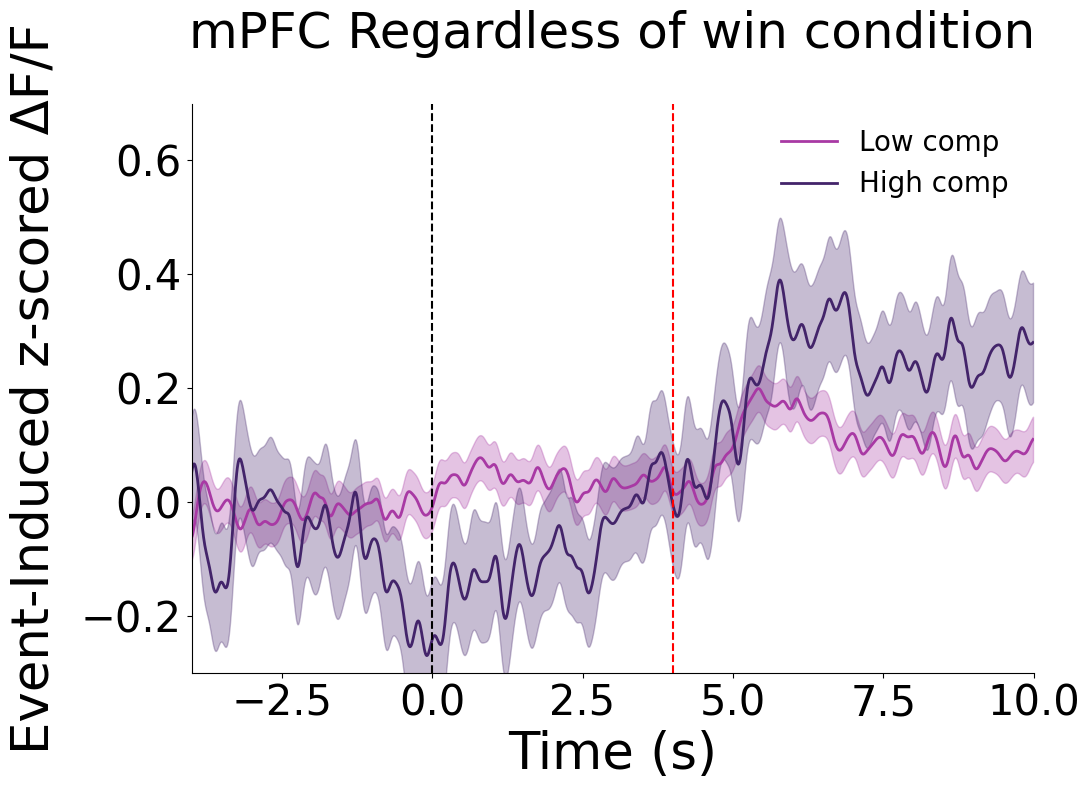

In [17]:
plot_psth_for_region(
    exploded_df = trial_exploded,
    region = 'NAc',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-4,10),
    labels      = ('Low comp','High comp'),
    figsize=(11,8),
    title = 'NAc Regardless of win condition'
)

plot_psth_for_region(
    exploded_df = trial_exploded,
    region = 'mPFC',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-4,10),
    labels      = ('Low comp','High comp'),
    figsize=(11,8),
    ylims= (-0.3,0.7),
    title = 'mPFC Regardless of win condition'
)

Low comp  (n=282): mean=2.832, SEM=0.124
High comp (n=51): mean=2.937, SEM=0.302
T-test: t=-0.331, p=0.741


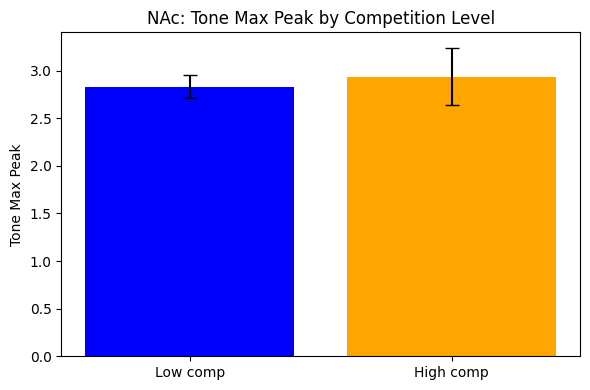

Low comp  (n=282): mean=2.420, SEM=0.124
High comp (n=51): mean=3.758, SEM=0.380
T-test: t=-4.022, p=0.000


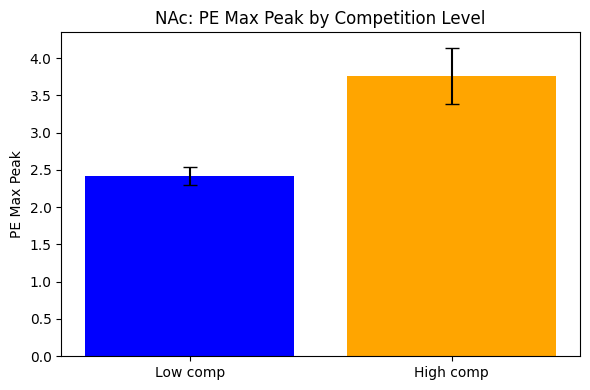

In [18]:
plot_comp_by_region(
    exploded_df=trial_exploded,
    region='NAc',
    metric='Tone Max Peak'
)

plot_comp_by_region(
    exploded_df=trial_exploded,
    region='NAc',
    metric='PE Max Peak'
)

Low comp  (n=282): mean=1.477, SEM=0.198
High comp (n=51): mean=1.856, SEM=0.539
T-test: t=-0.730, p=0.466


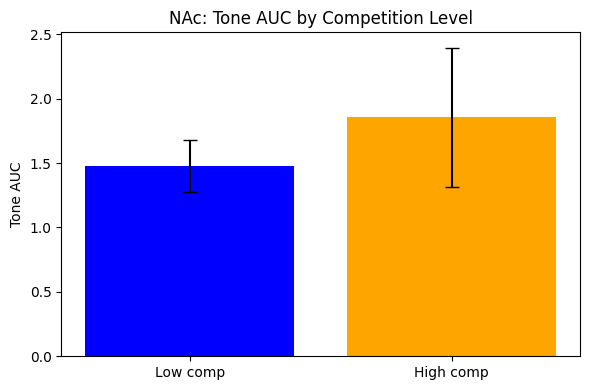

Low comp  (n=282): mean=1.397, SEM=0.209
High comp (n=51): mean=3.386, SEM=0.676
T-test: t=-3.492, p=0.001


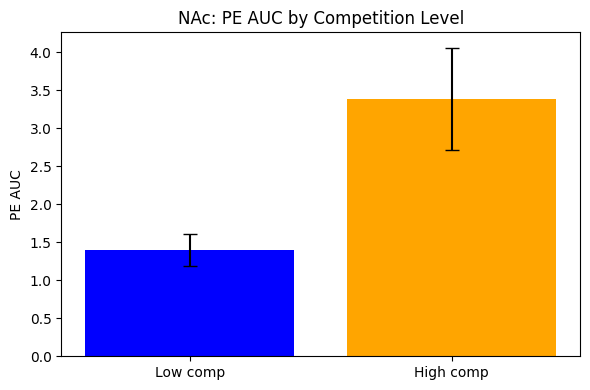

In [19]:
plot_comp_by_region(
    exploded_df=trial_exploded,
    region='NAc',
    metric='Tone AUC'
)

plot_comp_by_region(
    exploded_df=trial_exploded,
    region='NAc',
    metric='PE AUC'
)

Low comp  (n=506): mean=0.156, SEM=0.129
High comp (n=68): mean=-0.349, SEM=0.333
T-test: t=1.356, p=0.176


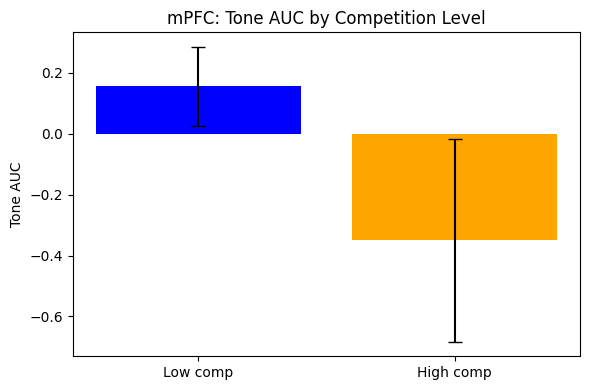

Low comp  (n=506): mean=0.724, SEM=0.147
High comp (n=68): mean=0.909, SEM=0.294
T-test: t=-0.446, p=0.656


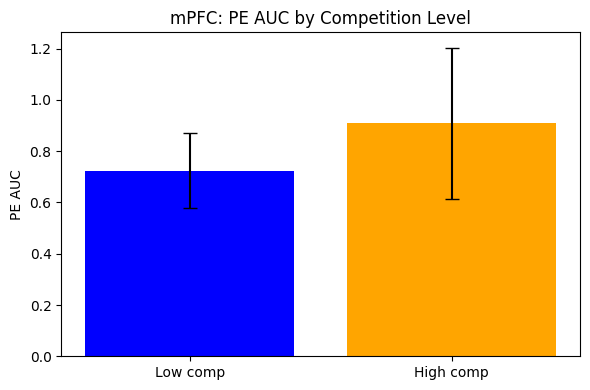

In [20]:
plot_comp_by_region(
    exploded_df=trial_exploded,
    region='mPFC',
    metric='Tone AUC'
)

plot_comp_by_region(
    exploded_df=trial_exploded,
    region='mPFC',
    metric='PE AUC'
)

## Splitting by win v loss and then looking at high vs. low comp

In [21]:
rc_exp.split_by_outcome()

In [22]:
# rc_exp.split_by_winner()

In [23]:
metrics = [
    'filtered_winner_array', 'HVL_Comp', 'Tone_Time_Axis', 'Tone_Zscore',
    'PE_Time_Axis', 'PE_Zscore', 
    'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak', 'Tone Mean Z-score',
    'PE AUC', 'PE Max Peak', 'PE Time of Max Peak', 'PE Mean Z-score',
]

win_exploded = explode_event_traces(
    rc_exp.winner_df,
    comp_col  = 'HVL_Comp',
    time_col  = 'Tone_Time_Axis',
    trace_col = 'Tone_Zscore',
    array_cols=metrics
)


In [24]:
metrics = [
    'filtered_winner_array', 'HVL_Comp', 'Tone_Time_Axis', 'Tone_Zscore',
    'PE_Time_Axis', 'PE_Zscore', 
    'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak', 'Tone Mean Z-score',
    'PE AUC', 'PE Max Peak', 'PE Time of Max Peak', 'PE Mean Z-score',
]

loss_exploded = explode_event_traces(
    rc_exp.loser_df,
    comp_col  = 'HVL_Comp',
    time_col  = 'Tone_Time_Axis',
    trace_col = 'Tone_Zscore',
    array_cols=metrics
)


In [25]:
tie_exploded = explode_event_traces_ties(
    rc_exp.tie_df,
    comp_col  = 'HVL_Comp',
    time_col  = 'Tone_Time_Axis',
    trace_col = 'Tone_Zscore',
    array_cols=metrics
)

In [26]:
rc_exp.tie_df.columns

Index(['subject_name', 'file name', 'trial', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'filtered_winner_array', 'HVL_PreComp', 'HVL_Comp',
       'first_PE_after_sound_cue', 'Tone_Time_Axis', 'Tone_Zscore',
       'PE_Time_Axis', 'PE_Zscore', 'Pretrial_Time_Axis', 'Pretrial_Zscore',
       'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak',
       'Tone Mean Z-score', 'PE AUC', 'PE Max Peak', 'PE Time of Max Peak',
       'PE Mean Z-score', 'Pretrial AUC', 'Pretrial Max Peak',
       'Pretrial Time of Max Peak', 'Pretrial Mean Z-score'],
      dtype='object')

In [27]:
tie_exploded.columns

Index(['subject_name', 'outcome', 'comp_raw', 'comp', 'time', 'trace',
       'filtered_winner_array', 'HVL_Comp', 'Tone_Time_Axis', 'Tone_Zscore',
       'PE_Time_Axis', 'PE_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'PE AUC', 'PE Max Peak',
       'PE Time of Max Peak', 'PE Mean Z-score'],
      dtype='object')

In [28]:
win_exploded.columns

Index(['subject_name', 'comp', 'time', 'trace', 'filtered_winner_array',
       'HVL_Comp', 'Tone_Time_Axis', 'Tone_Zscore', 'PE_Time_Axis',
       'PE_Zscore', 'Tone AUC', 'Tone Max Peak', 'Tone Time of Max Peak',
       'Tone Mean Z-score', 'PE AUC', 'PE Max Peak', 'PE Time of Max Peak',
       'PE Mean Z-score'],
      dtype='object')

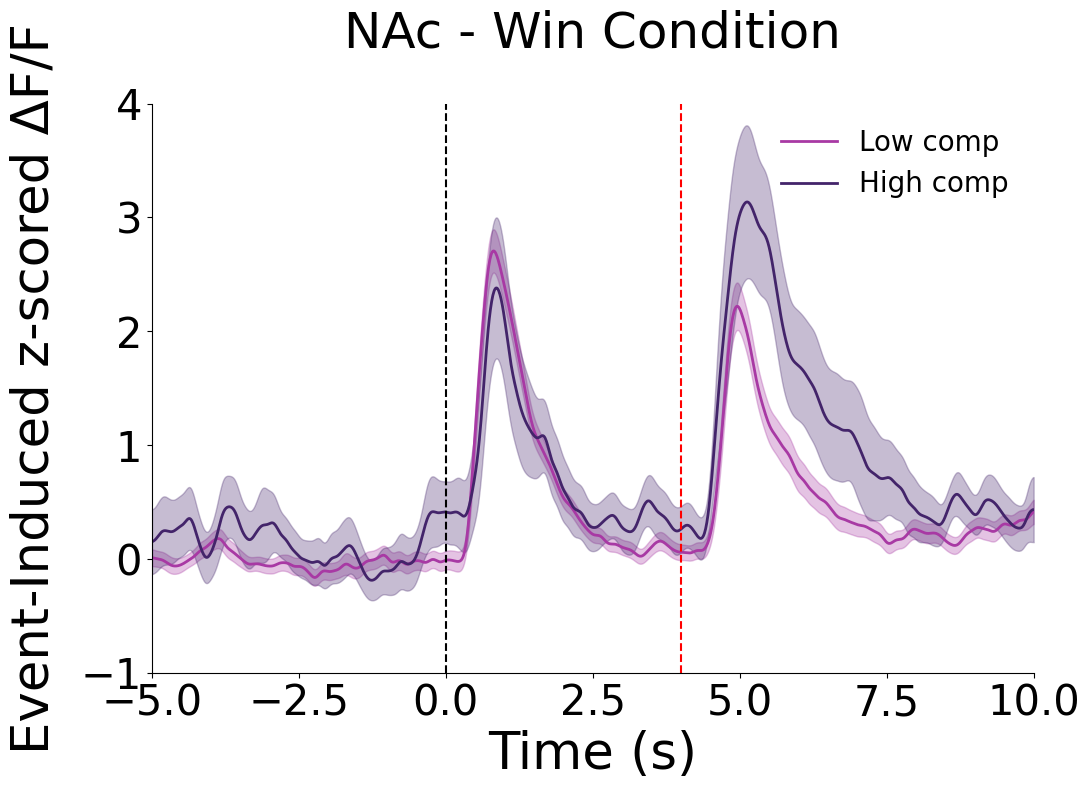

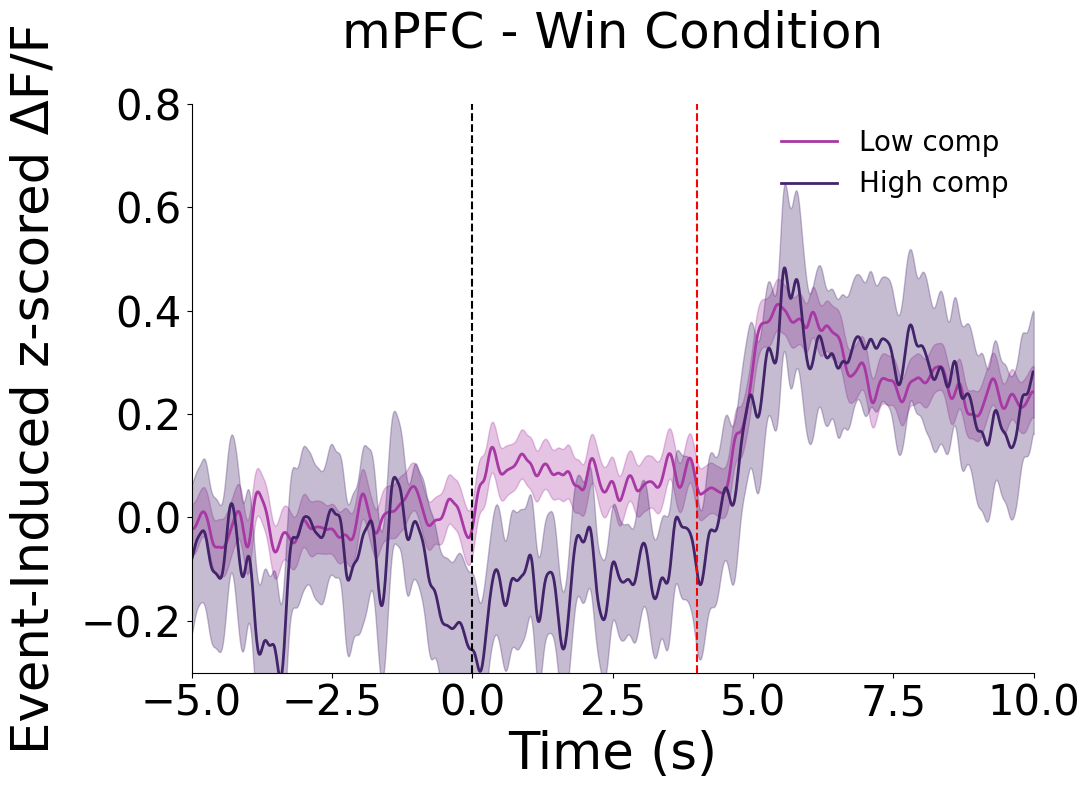

In [29]:
plot_psth_for_region(
    exploded_df = win_exploded,
    region = 'NAc',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-1,4),
    title = 'NAc - Win Condition'
)

plot_psth_for_region(
    exploded_df = win_exploded,
    region = 'mPFC',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-0.3,.8),
    title = 'mPFC - Win Condition'
)

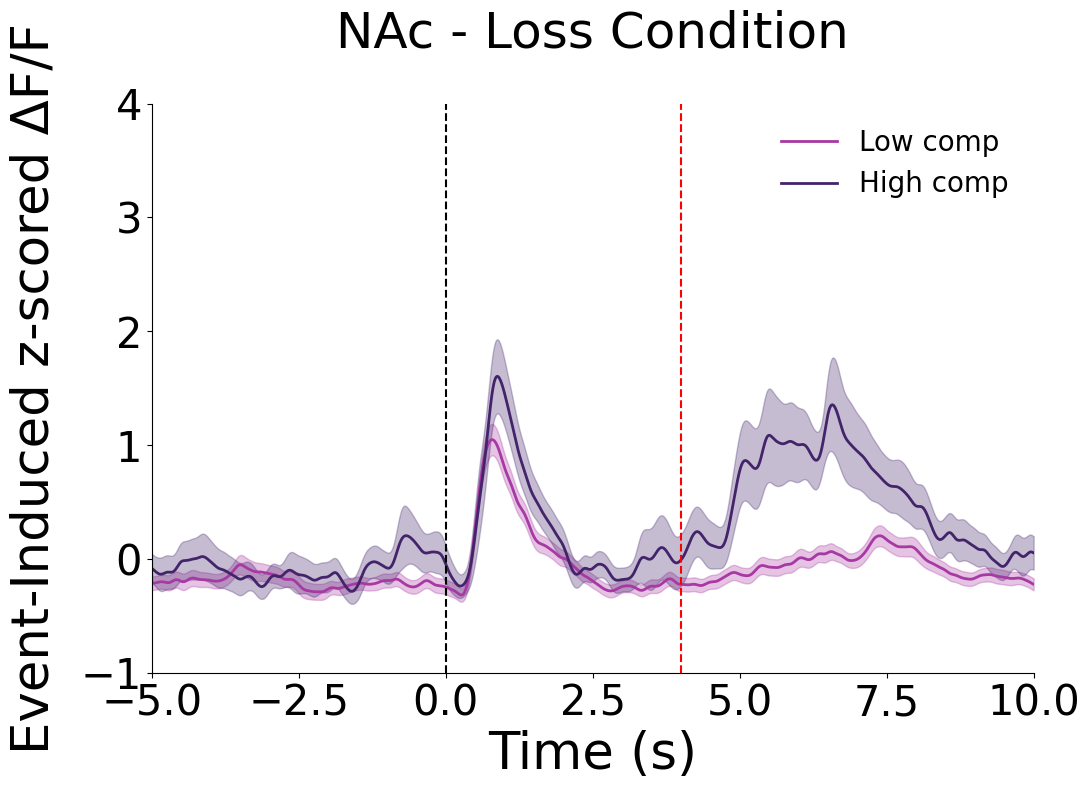

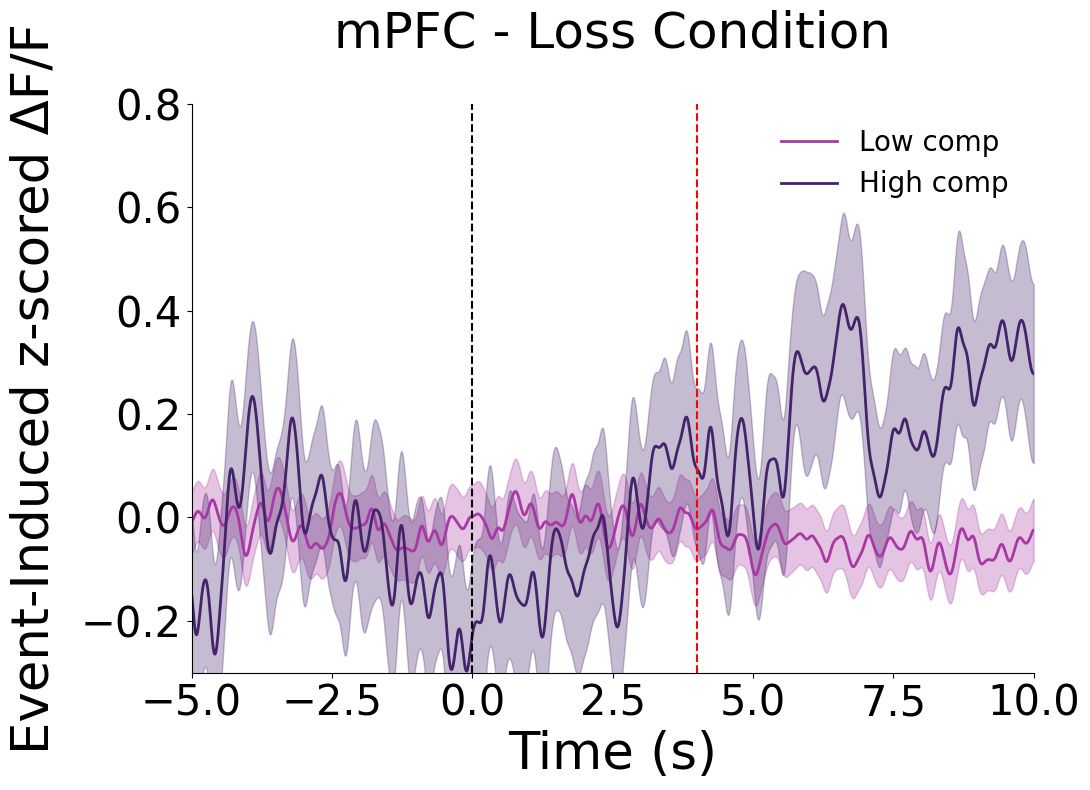

In [30]:
plot_psth_for_region(
    exploded_df = loss_exploded,
    region = 'NAc',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-1,4),
    title = 'NAc - Loss Condition'
)

plot_psth_for_region(
    exploded_df = loss_exploded,
    region = 'mPFC',
    time_col    = 'time',
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-0.3,.8),
    title = 'mPFC - Loss Condition'
)

In [31]:
def plot_psth_for_region_ties(
    exploded_df: pd.DataFrame,
    region:      str   = 'NAc',            # 'NAc' or 'mPFC'
    time_col:    str   = 'time',
    trace_col:   str   = 'trace',
    comp_col:    str   = 'comp',           # numeric 0/1 or mixed
    *,
    # tie detection options:
    outcome_col: str | None = None,        # e.g., 'outcome' with values {'low','high','tie'}
    tie_mask_col: str | None = None,       # boolean list per event marking ties
    tie_tokens:   tuple = ("T","t","tie","Tie","TIE"),
    ties_only:    bool  = False,
    # visuals:
    time_window: tuple = (-5.0, 10.0),
    line_at:     float = 4.0,
    colors:      tuple = ('#a839a4', '#43246a'),   # low, high
    labels:      tuple = ('Low comp', 'High comp'),
    tie_color:   str   = '#888888',
    tie_label:   str   = 'Tie',
    figsize:     tuple = (11,8),
    title:       str   = None,
    ylims:       tuple = None
):
    """
    Plot mean ± SEM PSTH for NAc or mPFC, supporting Low/High/Tie.
    If `outcome_col` is provided, it is used directly ('low','high','tie').
    Else, ties are inferred from `tie_mask_col` or from `comp_col` values.
    """
    # region filter
    prefix_map = {'NAc': 'n', 'mPFC': 'p'}
    if region not in prefix_map:
        raise ValueError(f"region must be one of {list(prefix_map)}")
    prefix = prefix_map[region]
    sub = exploded_df[exploded_df['subject_name'].str.startswith(prefix)]
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    if sub.empty:
        ax.set_title(f"No data for {region}", fontsize=36); ax.axis('off'); plt.show(); return

    # ---------- build a per-row condition label: 'low' | 'high' | 'tie' ----------
    def _label_row(row, idx=None):
        # priority 1: explicit outcome col
        if outcome_col and outcome_col in row and pd.notna(row[outcome_col]):
            val = str(row[outcome_col]).strip().lower()
            if val in ('low','high','tie'):
                return val

        # priority 2: tie mask column (boolean list aligned with events)
        if tie_mask_col and tie_mask_col in row:
            mask = row[tie_mask_col] if isinstance(row[tie_mask_col], list) else []
            if idx is not None and idx < len(mask):
                if bool(mask[idx]): return 'tie'

        # fallback: infer from comp_col
        c = row.get(comp_col, np.nan)
        # eventwise rows already hold scalar comp; if not, try to index
        if isinstance(c, (list, np.ndarray)) and idx is not None and idx < len(c):
            c = c[idx]
        # tie from token or NaN
        if (isinstance(c, str) and c.strip() in tie_tokens) or pd.isna(c):
            return 'tie'
        # numeric low/high
        try:
            v = int(c)
            return 'low' if v == 0 else ('high' if v == 1 else 'tie')
        except Exception:
            return 'tie'

    # if exploded_df is truly "exploded", each row is one event; no per-event idx.
    # We still call _label_row(row) without idx to classify the row.
    cond = sub.apply(lambda r: _label_row(r, None), axis=1)
    sub = sub.assign(_cond=cond)

    # ties_only filter
    if ties_only:
        sub = sub[sub['_cond'] == 'tie']
        cond_order = [('tie', tie_label, tie_color)]
    else:
        cond_order = [
            ('low',  labels[0], colors[0]),
            ('high', labels[1], colors[1]),
            ('tie',  tie_label, tie_color),
        ]

    # ---------- common dt & axis ----------
    all_dts = [np.min(np.diff(t)) for t in sub[time_col] if getattr(t, "size", 0) > 1]
    if not all_dts:
        ax.set_title("No valid Δt found in time axes!", fontsize=24); ax.axis('off'); plt.show(); return
    dt = min(all_dts)
    t0, t1 = time_window
    common_t = np.arange(t0, t1 + dt/2, dt)

    # ---------- plot per condition ----------
    any_plotted = False
    for key, lbl, col in cond_order:
        grp = sub[sub['_cond'] == key]
        if grp.empty:
            continue
        mats = []
        for _, row in grp.iterrows():
            t_evt = row[time_col]; z_evt = row[trace_col]
            if getattr(t_evt, "size", 0) < 2 or getattr(z_evt, "size", 0) < 2:
                continue
            z_i = np.interp(common_t, t_evt, z_evt, left=np.nan, right=np.nan)
            mats.append(z_i)
        if not mats:
            continue
        M = np.vstack(mats)
        mean_trace = np.nanmean(M, axis=0)
        sem_trace  = np.nanstd(M, axis=0, ddof=1) / np.sqrt(M.shape[0])
        ax.plot(common_t, mean_trace, lw=2, label=lbl, color=col)
        ax.fill_between(common_t, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3, color=col)
        any_plotted = True

    # ---------- styling ----------
    if not any_plotted:
        ax.set_title("No valid events to plot.", fontsize=24); ax.axis('off'); plt.show(); return

    ax.axvline(0, color='k', ls='--', lw=1.5)
    ax.axvline(line_at, color='red', ls='--', lw=1.5)
    ax.set_xlim(time_window)
    if ylims is not None:
        ax.set_ylim(ylims)

    ttl = title if title is not None else f"{region} PSTH: Low vs High" + (" (Ties only)" if ties_only else " (+ Ties)")
    ax.set_title(ttl, fontsize=32, pad=30)
    ax.set_xlabel("Time (s)", fontsize=30)
    ax.set_ylabel("Event-Induced z-scored ΔF/F", fontsize=30, labelpad=12)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.legend(frameon=False, fontsize=18, loc='upper right')
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    plt.tight_layout(); plt.show()


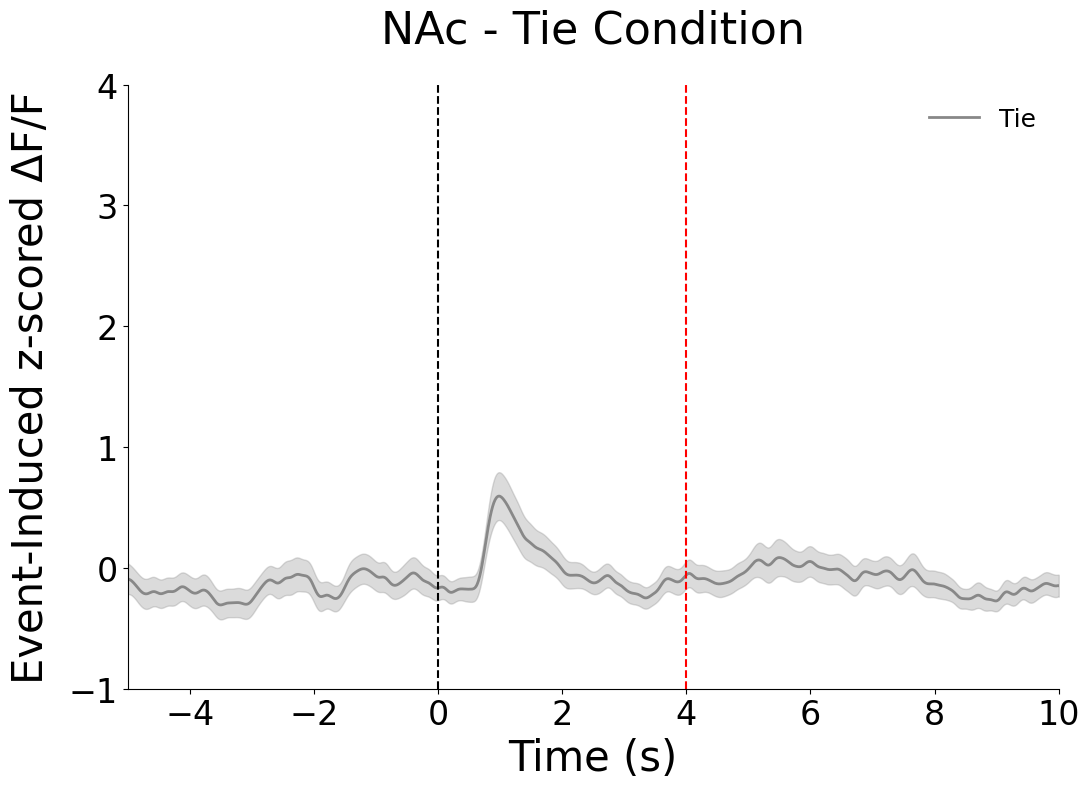

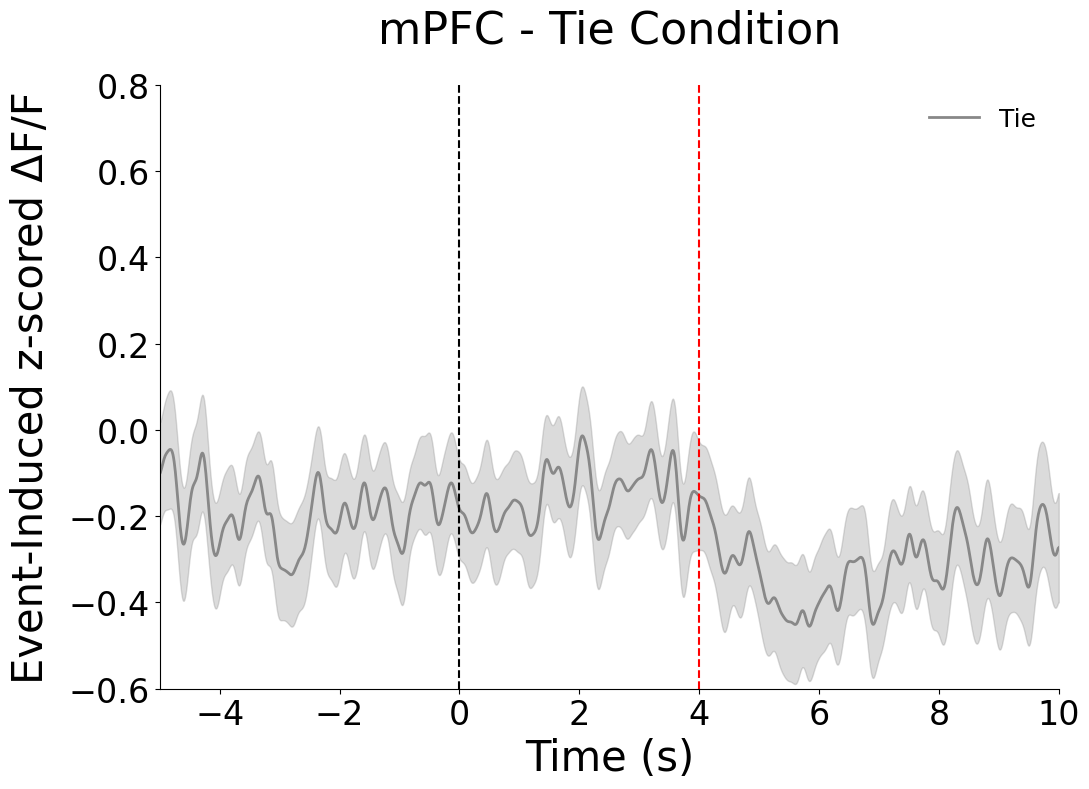

In [32]:
plot_psth_for_region_ties(
    exploded_df = tie_exploded,
    region = 'NAc',
    time_col    = 'time',
    ties_only=True,
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-1,4),
    title = 'NAc - Tie Condition'
)

plot_psth_for_region_ties(
    exploded_df = tie_exploded,
    region = 'mPFC',
    time_col    = 'time',
    ties_only=True,
    trace_col   = 'trace',
    comp_col    = 'comp',
    time_window = (-5,10),
    labels      = ('Low comp','High comp'),
    ylims= (-0.6,.8),
    title = 'mPFC - Tie Condition'
)

In [33]:
n_ties = len(rc_exp.tie_df)
print(f"Total tie events: {n_ties}")


Total tie events: 70


C:\Users\alber\AppData\Local\Temp\ipykernel_6660\2201525845.py:72: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(M, axis=0)
c:\Users\alber\anaconda3\envs\photometry\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


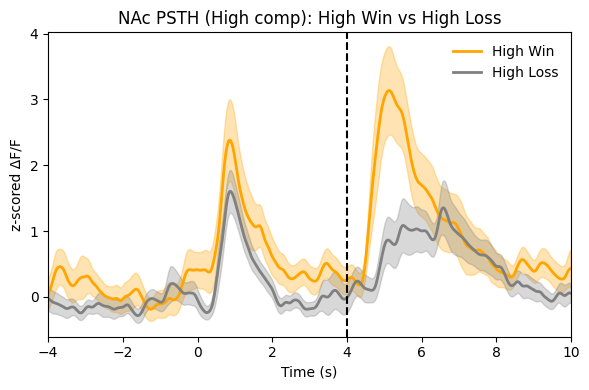

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_high_win_loss_psth(
    win_df:      pd.DataFrame,
    loss_df:     pd.DataFrame,
    region:      str      = 'NAc',          # 'NAc' or 'mPFC'
    time_col:    str      = 'time',
    trace_col:   str      = 'trace',
    comp_col:    str      = 'comp',
    time_window: tuple    = (-4.0, 10.0),
    line_at:     float    = 4.0,
    colors:      tuple    = ('orange', 'grey'),
    labels:      tuple    = ('High Win', 'High Loss'),
    figsize:     tuple    = (6,4)
):
    """
    Plot mean±SEM PSTH for just high-comp wins vs losses in a single region.
    
    Parameters
    ----------
    win_df, loss_df : DataFrame
        Exploded-event DataFrames for win and loss trials.
    region : {'NAc','mPFC'}
        Which region to plot (filters by subject_name prefix).
    time_col, trace_col : str
        Column names holding per-event time & trace arrays.
    comp_col : str
        Column name for competition label (1=high,0=low).
    time_window : (start,end)
        Time range for interpolation & plotting.
    line_at : float
        Vertical marker (e.g. tone onset).
    colors : (win_color, loss_color)
    labels : (win_label, loss_label)
    figsize : figure size
    """
    # 1) Region → prefix
    prefix_map = {'NAc':'n', 'mPFC':'p'}
    if region not in prefix_map:
        raise ValueError("region must be 'NAc' or 'mPFC'")
    pfx = prefix_map[region]

    # 2) filter for high-comp events in each DF
    win_sub  = win_df[  win_df['subject_name'].str.startswith(pfx) & (win_df[comp_col]==1) ]
    loss_sub = loss_df[ loss_df['subject_name'].str.startswith(pfx) & (loss_df[comp_col]==1) ]
    if win_sub.empty and loss_sub.empty:
        raise ValueError(f"No high-comp data for region {region}")

    # 3) determine smallest dt across both sets
    def _dts(dframe):
        return [np.min(np.diff(t)) for t in dframe[time_col] if getattr(t,'size',0)>1]
    all_dts = _dts(win_sub) + _dts(loss_sub)
    if not all_dts:
        raise RuntimeError("No valid Δt found!")
    dt = min(all_dts)

    # 4) build common time axis
    t0, t1 = time_window
    common_t = np.arange(t0, t1 + dt/2, dt)

    # 5) helper to compute mean & SEM
    def _mean_sem(subdf):
        mats = []
        for _, row in subdf.iterrows():
            t_evt = row[time_col]
            z_evt = row[trace_col]
            zi = np.interp(common_t, t_evt, z_evt,
                           left=np.nan, right=np.nan)
            mats.append(zi)
        M = np.vstack(mats) if mats else np.empty((0, len(common_t)))
        mean = np.nanmean(M, axis=0)
        sem  = np.nanstd(M, axis=0, ddof=1) / np.sqrt(M.shape[0]) if M.shape[0]>1 else np.zeros_like(common_t)
        return mean, sem

    win_mean,  win_sem  = _mean_sem(win_sub)
    loss_mean, loss_sem = _mean_sem(loss_sub)

    # 6) plot
    fig, ax = plt.subplots(1,1,figsize=figsize)
    ax.plot(common_t, win_mean,  color=colors[0], lw=2, label=labels[0])
    ax.fill_between(common_t,
                    win_mean-win_sem, win_mean+win_sem,
                    color=colors[0], alpha=0.3)

    ax.plot(common_t, loss_mean, color=colors[1], lw=2, label=labels[1])
    ax.fill_between(common_t,
                    loss_mean-loss_sem, loss_mean+loss_sem,
                    color=colors[1], alpha=0.3)

    ax.axvline(line_at, color='k', ls='--')
    ax.set_xlim(time_window)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("z-scored ΔF/F")
    ax.set_title(f"{region} PSTH (High comp): {labels[0]} vs {labels[1]}")
    ax.legend(frameon=False)
    plt.tight_layout()
    plt.show()

plot_high_win_loss_psth(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='NAc',
    time_col='time',
    trace_col='trace',
    comp_col='comp',
    time_window=(-4,10),
    line_at=4.0,
    colors=('orange','grey'),
    labels=('High Win','High Loss')
)


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def plot_win_loss_comp_by_region(
    win_df:     pd.DataFrame,
    loss_df:    pd.DataFrame,
    region:     str,             # 'NAc' or 'mPFC'
    metric:     str,             # e.g. 'Tone AUC'
    comp_col:   str = 'comp'
):
    """
    Bar plot (mean±SEM) of `metric` for four groups:
      High Win, High Loss, Low Win, Low Loss
    within the given brain region—and prints pairwise t-tests:
      • High Win vs High Loss
      • Low Win  vs Low Loss
      • High Win vs Low Win
      • High Loss vs Low Loss
    """
    # 1) map region → subject_name prefix
    prefix_map = {'NAc':'n', 'mPFC':'p'}
    if region not in prefix_map:
        raise ValueError(f"region must be one of {list(prefix_map)}")
    p = prefix_map[region]

    # 2) define the four (comp, outcome, label) combos
    combos = [
        (1, 'win',  'High Win'),
        (1, 'loss', 'High Loss'),
        (0, 'win',  'Low Win'),
        (0, 'loss', 'Low Loss'),
    ]

    # 3) collect series, means & sems
    series_dict = {}
    means, sems, labels = [], [], []
    for comp_val, outcome, label in combos:
        df = win_df if outcome == 'win' else loss_df
        sel = df[
            df['subject_name'].str.startswith(p) &
            (df[comp_col] == comp_val)
        ][metric].dropna()

        series_dict[(comp_val, outcome)] = sel
        means.append(sel.mean())
        sems.append(sel.sem())
        labels.append(label)

    # 4) print pairwise t-tests
    tests = [
        ((1,'win'),  (1,'loss'),  'High Win vs High Loss'),
        ((0,'win'),  (0,'loss'),  'Low Win  vs Low Loss'),
        ((1,'win'),  (0,'win'),   'High Win vs Low Win'),
        ((1,'loss'), (0,'loss'),  'High Loss vs Low Loss'),
    ]
    print(f"=== Stats for {region}, metric = {metric} ===")
    for k1, k2, name in tests:
        a = series_dict[k1]
        b = series_dict[k2]
        t_stat, p_val = ttest_ind(a, b, nan_policy='omit')
        print(f"{name}: n₁={len(a)}, n₂={len(b)}, t={t_stat:.3f}, p={p_val:.3f}")
    print("="*40)

    # 5) plot
    x = np.arange(len(labels))
    colors = ['orange','orange','blue','blue']  # high→orange, low→blue
    hatches = ['', '/', '', '/']               # loss bars hatched

    fig, ax = plt.subplots(figsize=(6,4))
    for xi, (m, s, c, h) in enumerate(zip(means, sems, colors, hatches)):
        ax.bar(xi, m, yerr=s,
               color=c, edgecolor='k',
               hatch=h, capsize=5)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right')
    ax.set_ylabel(metric)
    ax.set_title(f"{region}: {metric} by Win/Loss & Comp")
    plt.tight_layout()
    plt.show()


=== Stats for NAc, metric = Tone AUC ===
High Win vs High Loss: n₁=21, n₂=30, t=1.901, p=0.063
Low Win  vs Low Loss: n₁=134, n₂=148, t=7.313, p=0.000
High Win vs Low Win: n₁=21, n₂=134, t=0.210, p=0.834
High Loss vs Low Loss: n₁=30, n₂=148, t=1.436, p=0.153


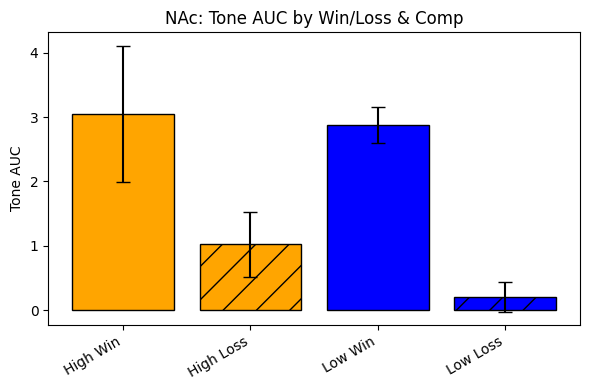

=== Stats for NAc, metric = Tone Max Peak ===
High Win vs High Loss: n₁=21, n₂=30, t=0.842, p=0.404
Low Win  vs Low Loss: n₁=134, n₂=148, t=7.579, p=0.000
High Win vs Low Win: n₁=21, n₂=134, t=-0.979, p=0.329
High Loss vs Low Loss: n₁=30, n₂=148, t=2.009, p=0.046


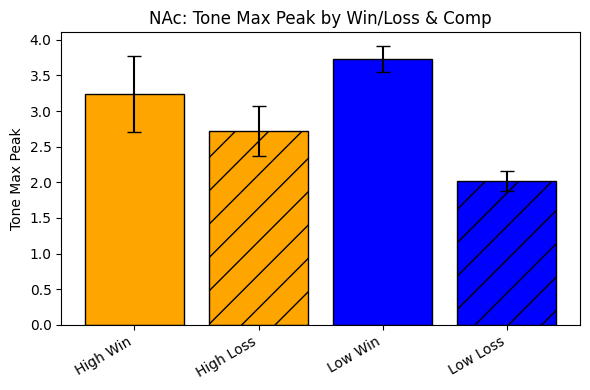

In [36]:
plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='NAc',
    metric='Tone AUC'
)

plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='NAc',
    metric='Tone Max Peak'
)

=== Stats for NAc, metric = PE AUC ===
High Win vs High Loss: n₁=21, n₂=30, t=1.201, p=0.235
Low Win  vs Low Loss: n₁=134, n₂=148, t=4.828, p=0.000
High Win vs Low Win: n₁=21, n₂=134, t=1.865, p=0.064
High Loss vs Low Loss: n₁=30, n₂=148, t=4.031, p=0.000


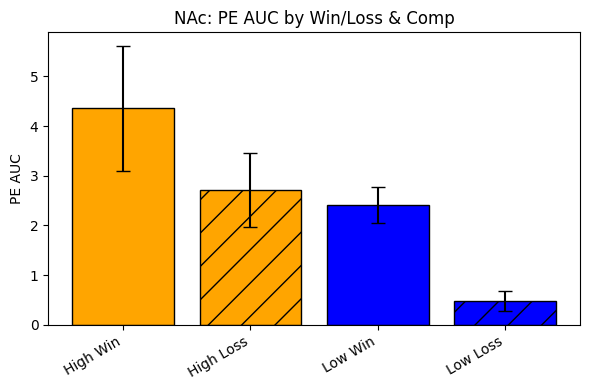

=== Stats for NAc, metric = PE Max Peak ===
High Win vs High Loss: n₁=21, n₂=30, t=0.766, p=0.447
Low Win  vs Low Loss: n₁=134, n₂=148, t=6.496, p=0.000
High Win vs Low Win: n₁=21, n₂=134, t=1.542, p=0.125
High Loss vs Low Loss: n₁=30, n₂=148, t=5.488, p=0.000


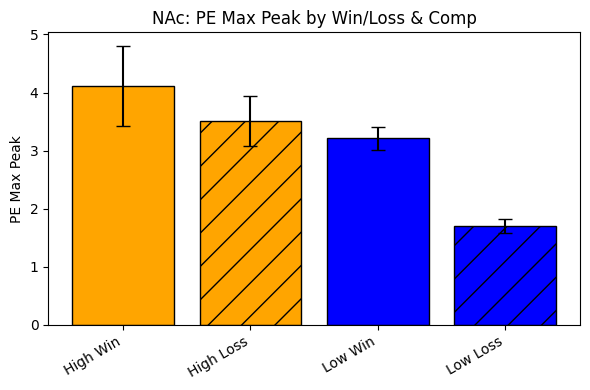

In [37]:
plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='NAc',
    metric='PE AUC'
)

plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='NAc',
    metric='PE Max Peak'
)

mPFc

=== Stats for mPFC, metric = Tone AUC ===
High Win vs High Loss: n₁=34, n₂=34, t=-0.402, p=0.689
Low Win  vs Low Loss: n₁=254, n₂=252, t=1.307, p=0.192
High Win vs Low Win: n₁=34, n₂=254, t=-1.915, p=0.056
High Loss vs Low Loss: n₁=34, n₂=252, t=-0.327, p=0.744


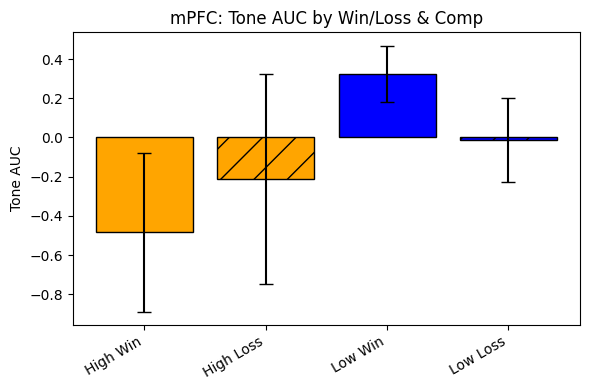

=== Stats for mPFC, metric = Tone Max Peak ===
High Win vs High Loss: n₁=34, n₂=34, t=-2.111, p=0.039
Low Win  vs Low Loss: n₁=254, n₂=252, t=-1.053, p=0.293
High Win vs Low Win: n₁=34, n₂=254, t=-3.147, p=0.002
High Loss vs Low Loss: n₁=34, n₂=252, t=-0.485, p=0.628


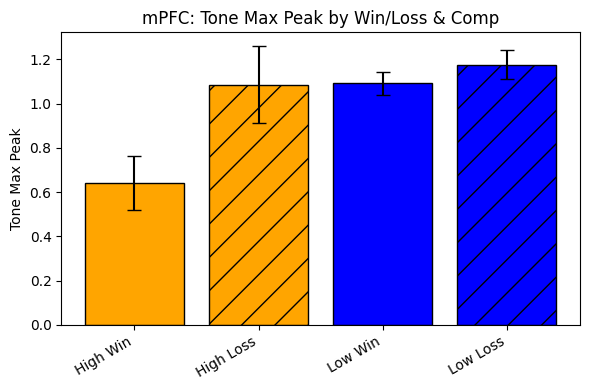

In [38]:
plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='mPFC',
    metric='Tone AUC'
)

plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='mPFC',
    metric='Tone Max Peak'
)

=== Stats for mPFC, metric = PE AUC ===
High Win vs High Loss: n₁=34, n₂=34, t=-0.427, p=0.671
Low Win  vs Low Loss: n₁=254, n₂=252, t=4.313, p=0.000
High Win vs Low Win: n₁=34, n₂=254, t=-1.211, p=0.227
High Loss vs Low Loss: n₁=34, n₂=252, t=1.390, p=0.165


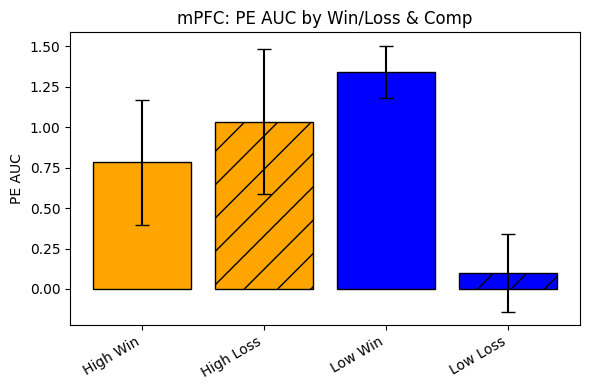

=== Stats for mPFC, metric = PE Max Peak ===
High Win vs High Loss: n₁=34, n₂=34, t=-2.287, p=0.025
Low Win  vs Low Loss: n₁=254, n₂=252, t=1.611, p=0.108
High Win vs Low Win: n₁=34, n₂=254, t=-2.328, p=0.021
High Loss vs Low Loss: n₁=34, n₂=252, t=1.314, p=0.190


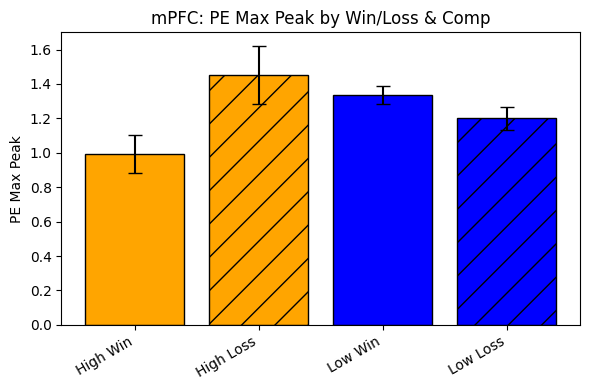

In [39]:
plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='mPFC',
    metric='PE AUC'
)

plot_win_loss_comp_by_region(
    win_df=win_exploded,
    loss_df=loss_exploded,
    region='mPFC',
    metric='PE Max Peak'
)